In [2]:
import os

texts = {}

for writer in os.listdir('./texts'):
    textNames = os.listdir('./texts/' + writer)
    texts.update({writer: textNames})

writers = list(texts.keys())

print(writers)

['Пелевин Виктор', 'Гоголь Николай Васильевич', 'Достоевский Федор Михайлович', 'Стругацкий Аркадий Натанович', 'Булгаков Михаил Афанасьевич']


In [3]:
# Выводим список произведений по авторам
print(texts)

{'Пелевин Виктор': ['П5  Прощальные песни политических пигмеев Пиндостана.txt', 'Омон Ра.txt', 'Жизнь насекомых.txt'], 'Гоголь Николай Васильевич': ['Вий.txt', 'Мертвые души.txt', 'Вечера на хуторе близ Диканьки.txt'], 'Достоевский Федор Михайлович': ['Идиот.txt', 'Братья Карамазовы.txt', 'Преступление и наказание.txt'], 'Стругацкий Аркадий Натанович': ['Улитка на склоне.txt', 'Понедельник начинается в субботу.txt', 'Пикник на обочине.txt'], 'Булгаков Михаил Афанасьевич': ['Мастер и Маргарита.txt', 'Собачье сердце.txt', 'Записки юного врача.txt']}


In [4]:
# Функция для разбиения входных текстов на части по n символов
import itertools
def grouper(n, iterable):
    args = [iter(iterable)] * n
    #return list(map(lambda s: "".join(s), list([e for e in t if e != None] for t in itertools.zip_longest(*args))))
    return list("".join([e for e in t if e != None]) for t in itertools.zip_longest(*args))

In [5]:
# Загружаем тексты
data = []
for writer in writers:
    books = []
    for text in texts[writer]:
        with open('./texts/' + writer + '/' + text) as bookFile:
            book = bookFile.read().replace('\n', ' ').replace('\xa0', ' ')
            for b in grouper(100000, book):
                books.append(b)
    data.append(books)

In [6]:
# Загрузка необходимых для работы с текстами модулей
import spacy
nlp = spacy.load('/home/lvova/Documents/python/spacy-ru/ru2')

In [7]:
from nltk.tokenize import sent_tokenize

In [8]:
# Разобьём по предложениям
sent_tokenize_list = sent_tokenize(data[0][0])

In [9]:
# Посмотрим на результат разделения по предложениям
for sent_index, sent in enumerate(sent_tokenize_list):
    print("#{}:{}".format(sent_index,sent))

#0:﻿Виктор ПЕЛЕВИН П5: Прощальные песни политических пигмеев Пиндостана Зал поющих кариатид Лена пришла на прослушивание за два часа до назначенного срока, но все равно оказалась в очереди девятой.
#1:Девушки, собравшиеся в небольшом холле — среди желтой кожи, стекла, хрома и винтажных голливудских плакатов, украшавших стены вместо картин, — заметно нервничали.
#2:Лена тоже.
#3:Девушки исчезали за дверью из матового стекла с интервалом примерно в четверть часа, потом выныривали и шли к выходу.
#4:По их лицам ничего нельзя было понять.
#5:Когда по холлу пролетел звон электронного колокольчика и секретарша назвала ее фамилию, Лена вдруг запаниковала и долго не могла засунуть книгу в сумочку, так что секретарша даже нажала на кнопку еще раз.
#6:Но по пути к матовой двери Лена пришла в себя — и толкнула ее уверенной рукой.
#7:За дверью оказался небольшой кабинет, похожий на приемную доктора-косметолога: письменный стол, пара кресел и жесткая медицинская кушетка, обтянутая клеенкой.
#8:Хозя

In [10]:
# Напишем функцию, которая парсит по одному предложению и выводит некоторую информацию:
def parse_one_sentence(one_sentence):
    doc = nlp(one_sentence)
    for token in doc:
        print('{} \ {} \ {} \ {} \ {} \ {}'.format(
            token.text, 
            token.lemma_,
            token.pos_, 
            token.tag_, 
            token.dep_, 
            token.head.text
        ))

In [11]:
# Теперь проведем анализ для каждого из предложений
for sent_index, sent in enumerate(sent_tokenize_list[:10]):
    print("Sentence #{}\t{}".format(sent_index,sent))
    parse_one_sentence(sent)
    print('\n\n')

Sentence #0	﻿Виктор ПЕЛЕВИН П5: Прощальные песни политических пигмеев Пиндостана Зал поющих кариатид Лена пришла на прослушивание за два часа до назначенного срока, но все равно оказалась в очереди девятой.
﻿Виктор \ ﻿виктор \ NOUN \ NOUN__Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing \ ROOT \ ﻿Виктор
ПЕЛЕВИН \ пелевин \ NOUN \ NOUN__Animacy=Inan|Case=Gen|Gender=Fem|Number=Plur \ nmod \ ﻿Виктор
П5 \ п5 \ PROPN \ PROPN___ \ flat:name \ ПЕЛЕВИН
: \ : \ PUNCT \ PUNCT___ \ punct \ ﻿Виктор
Прощальные \ прощальный \ ADJ \ ADJ__Animacy=Inan|Case=Acc|Degree=Pos|Number=Plur \ amod \ песни
песни \ песнь \ NOUN \ NOUN__Animacy=Inan|Case=Acc|Gender=Fem|Number=Plur \ nsubj \ пришла
политических \ политический \ ADJ \ ADJ__Case=Gen|Degree=Pos|Number=Plur \ amod \ пигмеев
пигмеев \ пигмей \ NOUN \ NOUN__Animacy=Anim|Case=Gen|Gender=Masc|Number=Plur \ nmod \ песни
Пиндостана \ пиндостана \ PROPN \ PROPN__Animacy=Anim|Case=Gen|Gender=Masc|Number=Sing \ appos \ песни
Зал \ зал \ NOUN \ NOUN__Animacy=Ina

Но \ но \ CCONJ \ CCONJ___ \ cc \ пришла
по \ по \ ADP \ ADP___ \ case \ пути
пути \ путь \ NOUN \ NOUN__Animacy=Inan|Case=Dat|Gender=Masc|Number=Sing \ obl \ пришла
к \ к \ ADP \ ADP___ \ case \ двери
матовой \ матовый \ ADJ \ ADJ__Case=Dat|Degree=Pos|Gender=Fem|Number=Sing \ amod \ двери
двери \ дверь \ NOUN \ NOUN__Animacy=Inan|Case=Dat|Gender=Fem|Number=Sing \ nmod \ пути
Лена \ лена \ PROPN \ PROPN__Animacy=Anim|Case=Gen|Gender=Fem|Number=Sing \ nsubj \ пришла
пришла \ прийти \ VERB \ VERB__Aspect=Perf|Gender=Fem|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act \ ROOT \ пришла
в \ в \ ADP \ ADP___ \ case \ себя
себя \ себя \ PRON \ PRON__Case=Acc \ obl \ пришла
— \ -- \ PUNCT \  \ obl \ пришла
и \ и \ CCONJ \ CCONJ___ \ cc \ толкнула
толкнула \ толкнуть \ VERB \ VERB__Aspect=Perf|Gender=Fem|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act \ conj \ пришла
ее \ ее \ X \ DET___ \ obj \ толкнула
уверенной \ уверенный \ ADJ \ ADJ__Case=Ins|Degree=Pos|Gender=Fem|Number=Sing 

In [12]:
# Используем одно из предложений
sent_tokenize_list[4]

'По их лицам ничего нельзя было понять.'

In [13]:
# Выводим семантическое дерево
doc = nlp(sent_tokenize_list[4])

from nltk import Tree

def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_

to_nltk_tree(list(doc.sents)[0].root).pretty_print()

         нельзя                 
  _________|________________     
 |    |         лицам     понять
 |    |     ______|____     |    
было  .    По          их ничего



In [14]:
# Функция для получения атрибутов, характеризующих авторский стиль (число слов в предложении, 
# число потомков корня, глубина семантического дерева)
def attr(doc):
    out = {'sentSize': len(doc)}
    for word in doc:
        if word.dep_ =='ROOT': out.update({'rootChild': len(list(word.children))})

    import json

    def depth(jsn):
        if 'modifiers' in jsn.keys():
            return 1 +  max([0] + list(map(depth, jsn['modifiers'])))
        else:
            return 1

    j = json.loads(str(doc.print_tree()[0]).replace('\'', "\""))
    out.update({'depthTree': depth(j)})
#     print(out)
    return out

In [15]:
doc

По их лицам ничего нельзя было понять.

In [16]:
attr(doc)

{'depthTree': 3, 'rootChild': 4, 'sentSize': 8}

In [17]:
from itertools import combinations

In [42]:
# Вычисление числа встречающихся в тексте различных трилетов
# Используются топ-10 из наиболее встречаемых трилетов
def treelets(data, topN=10):
    one_gram_treelet = {}
    two_gram_treelet = {}
    three_gram_treelet = {}
    for sent in sent_tokenize(data):
        doc = nlp(sent)

        for token in doc:
            key = token.pos_
            one_gram_treelet.update({key: one_gram_treelet.get(key, 0) + 1})

            key = (token.head.pos_, token.dep_, token.pos_)
            two_gram_treelet.update({key: two_gram_treelet.get(key, 0) + 1})

            for (left_child, right_child) in combinations(token.children, 2):
                if left_child.dep_ != 'punct' and right_child.dep_ != 'punct':
                    key = (1, left_child.pos_, left_child.dep_, token.pos_, right_child.dep_, right_child.pos_)
                    three_gram_treelet.update({key: three_gram_treelet.get(key, 0) + 1})
            if token.dep_ != 'ROOT':
                for child in token.children:
                    if child.dep_ == 'punct' or token.dep_ == 'punct':
                        continue
                    key = (2, child.pos_, child.dep_, token.pos_, token.dep_, token.head.pos_)
                    three_gram_treelet.update({key: three_gram_treelet.get(key, 0) + 1})
                    
    import operator
    sorted_1gram_treelet = {}
    from collections import OrderedDict
    from operator import itemgetter
    sorted_1gram_treelet = dict((sorted(one_gram_treelet.items(), key=itemgetter(1)))[-topN:])  
    sorted_2gram_treelet = dict((sorted(two_gram_treelet.items(), key=itemgetter(1)))[-topN:])
    sorted_3gram_treelet = dict((sorted(three_gram_treelet.items(), key=itemgetter(1)))[-topN:])
    return (len(sent_tokenize(data)), sorted_1gram_treelet, sorted_2gram_treelet, sorted_3gram_treelet)

In [44]:
(numOfSents, sorted_1gram_treelet, sorted_2gram_treelet, sorted_3gram_treelet) = treelets(data[0][0])
print(numOfSents)
print(sorted_1gram_treelet)

1221
{'PROPN': 632, 'ADP': 1614, 'NOUN': 3517, 'PUNCT': 4067, 'ADV': 1032, 'PART': 789, 'ADJ': 1736, 'CCONJ': 646, 'PRON': 1266, 'VERB': 2355}


In [39]:
print(sorted_2gram_treelet)
print(list(sorted_2gram_treelet.keys()))

{('VERB', 'nsubj', 'PRON'): 412, ('VERB', 'nsubj', 'NOUN'): 546, ('NOUN', 'nmod', 'NOUN'): 592, ('VERB', 'punct', 'PUNCT'): 1864, ('VERB', 'ROOT', 'VERB'): 766, ('VERB', 'advmod', 'ADV'): 491, ('NOUN', 'case', 'ADP'): 1139, ('VERB', 'obl', 'NOUN'): 892, ('NOUN', 'punct', 'PUNCT'): 605, ('NOUN', 'amod', 'ADJ'): 1050}
[('VERB', 'nsubj', 'PRON'), ('VERB', 'nsubj', 'NOUN'), ('NOUN', 'nmod', 'NOUN'), ('VERB', 'punct', 'PUNCT'), ('VERB', 'ROOT', 'VERB'), ('VERB', 'advmod', 'ADV'), ('NOUN', 'case', 'ADP'), ('VERB', 'obl', 'NOUN'), ('NOUN', 'punct', 'PUNCT'), ('NOUN', 'amod', 'ADJ')]


In [40]:
print(sorted_3gram_treelet)

{(1, 'ADP', 'case', 'NOUN', 'nmod', 'NOUN'): 199, (1, 'ADJ', 'amod', 'NOUN', 'nmod', 'NOUN'): 181, (1, 'ADP', 'case', 'NOUN', 'amod', 'ADJ'): 363, (2, 'CCONJ', 'cc', 'VERB', 'conj', 'VERB'): 202, (2, 'NOUN', 'nmod', 'NOUN', 'obl', 'VERB'): 149, (2, 'ADJ', 'amod', 'NOUN', 'nmod', 'NOUN'): 193, (2, 'ADP', 'case', 'NOUN', 'nmod', 'NOUN'): 219, (2, 'ADP', 'case', 'PRON', 'obl', 'VERB'): 161, (2, 'ADJ', 'amod', 'NOUN', 'obl', 'VERB'): 293, (2, 'ADP', 'case', 'NOUN', 'obl', 'VERB'): 675}


In [46]:
import pickle
if 0:
    # Анализ текстов по трилетам
    trByAuth = []
    for authorTexts in data:
        trByText = []
        for text in authorTexts:
            trByText.append(treelets(text))
        trByAuth.append(trByText)
        # Сохранение полученных атрибутов для дальнейшего использования
    with open('dataTr.pickle', 'wb') as f:
        pickle.dump(trByAuth, f)

In [56]:
with open('dataTr.pickle', 'rb') as f:
    trByAuth = pickle.load(f)

In [151]:
trAuth = []
for auth in trByAuth:
    trText = []
    for text in auth:
        numOfSent = 1#text[0]
        numOfTreelets = list(map(lambda x: x/numOfSent, list(text[1].values()) + list(text[2].values()) + list(text[3].values())))
        trText.append(numOfTreelets)
    trAuth.append(trText)

In [153]:
# K-Means кластеризация
from sklearn.cluster import KMeans
Xtr = trAuth[0] + trAuth[1] + trAuth[2] + trAuth[3] + trAuth[4]

In [154]:
# Выбор оптимального числа классов
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(Xtr)
#     data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

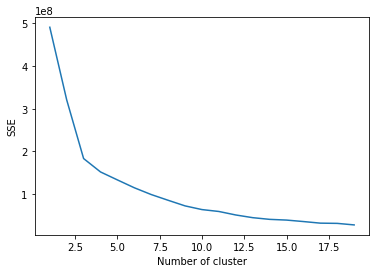

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [156]:
# Пусть будет 5
kmeans = KMeans(n_clusters=5, random_state=0).fit(Xtr)

In [157]:
# Доля соответствия номера автора номеру кластера
import numpy as np
matches = []
for Nclust in range(5):
    clustMatches = []
    for Nauth in range(5):
        authMatches = 0
        for i in kmeans.predict(np.array(trAuth[Nauth])):
            if i == Nclust: authMatches += 1
        clustMatches.append(authMatches/len(trAuth[Nauth]))
    matches.append(clustMatches)

In [159]:
for line in matches:
    for item in line:
        print("{:f}".format(item), end=' ')
    print(np.argmax(line), end='')
    print()

0.222222 0.000000 0.044444 0.000000 0.000000 0
0.666667 1.000000 0.466667 0.727273 0.846154 1
0.111111 0.000000 0.044444 0.000000 0.153846 4
0.000000 0.000000 0.288889 0.181818 0.000000 2
0.000000 0.000000 0.155556 0.090909 0.000000 2


In [119]:
# Анализ текстов по атрибутам дерева
if 0:
    attrsByAuth = []
    for authorTexts in data:
        attrsByText = []
        for text in authorTexts:
            sents = sent_tokenize(text)
            attrBySent = []
            for sent in sents:
                doc = nlp(sent)
                try:
                    attrBySent.append(attr(doc))
                except:
                    pass
            attrsByText.append(attrBySent)
        attrsByAuth.append(attrsByText)
        # Сохранение полученных атрибутов для дальнейшего использования
        with open('data.pickle', 'wb') as f:
            pickle.dump(attrsByAuth, f)

In [122]:
with open('data.pickle', 'rb') as f:
    attrsByAuth = pickle.load(f)

In [123]:
# Средние значения и СКО атрибутов по авторам (для первого текста)
import numpy as np
for i in range(5):
    depthTreeMean = np.mean([sent['depthTree'] for sent in attrsByAuth[i][0]])
    depthTreeStd = np.std([sent['depthTree'] for sent in attrsByAuth[i][0]])
    print(depthTreeMean, depthTreeStd)

4.74800796812749 2.0161810612268076
4.4601386481802425 1.8919391118533362
4.705573080967403 2.0239264040556204
4.390127388535032 1.8126496379297383
3.890808569454043 1.7163685636495871


In [127]:
# Усреднение атрибутов по всем текстам каждого из авторов
aAuth = []
for auth in attrsByAuth:
    aText = []
    for text in auth:
        x = [0,0,0]
        n = len(text)
#         print(n)
        for sent in text:
            x[0] += sent['depthTree'] / n
            x[1] += sent['rootChild'] / n
            x[2] += sent['sentSize'] / n
        aText.append(x)
    aAuth.append(aText)

In [128]:
# K-Means кластеризация
X = np.array(aAuth[0] + aAuth[1] + aAuth[2] + aAuth[3] + aAuth[4])

In [140]:
# Выбор оптимального числа классов
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(X)
#     data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

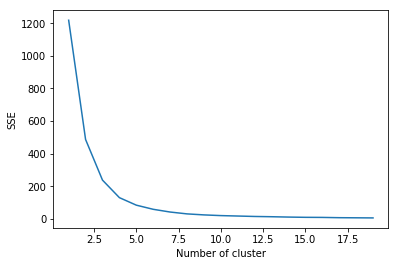

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [129]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [130]:
# Доля соответствия номера автора номеру кластера
matches = []
for Nclust in range(5):
    clustMatches = []
    for Nauth in range(5):
        authMatches = 0
        for i in kmeans.predict(np.array(aAuth[Nauth])):
            if i == Nclust: authMatches += 1
        clustMatches.append(authMatches/len(aAuth[Nauth]))
    matches.append(clustMatches)

In [131]:
for line in matches:
    for item in line:
        print("{:f}".format(item), end=' ')
    print(np.argmax(line), end='')
    print()

0.230769 0.333333 0.444444 0.285714 0.000000 2
0.000000 0.000000 0.066667 0.142857 0.000000 3
0.384615 0.333333 0.022222 0.142857 0.727273 4
0.000000 0.111111 0.200000 0.142857 0.000000 2
0.384615 0.222222 0.266667 0.285714 0.272727 0


In [132]:
# Аналогичная кластеризация без усреднения по предложениям
aAuthL = []
for auth in attrsByAuth:
    aText = []
    for text in auth:
        for sent in text:
            aText.append([ sent['depthTree'], sent['rootChild'], sent['sentSize'] ])
    aAuthL.append(aText)

In [133]:
XL = np.array(aAuthL[0] + aAuthL[1] + aAuthL[2] + aAuthL[3] + aAuthL[4])

In [142]:
# Выбор оптимального числа классов
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(XL)
#     data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

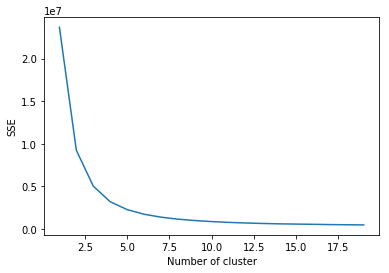

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [144]:
# from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(XL)

In [145]:
# Доля соответствия номера автора номеру кластера
matches = []
for Nclust in range(5):
    clustMatches = []
    for Nauth in range(5):
        authMatches = 0
        for i in kmeans.predict(np.array(aAuth[Nauth])):
            if i == Nclust: authMatches += 1
        clustMatches.append(authMatches/len(aAuth[Nauth]))
    matches.append(clustMatches)

In [146]:
for line in matches:
    for item in line:
        print("{:f}".format(item), end=' ')
    print(np.argmax(line), end='')
    print()

0.000000 0.000000 0.000000 0.000000 0.090909 4
1.000000 1.000000 0.911111 0.857143 0.909091 0
0.000000 0.000000 0.000000 0.000000 0.000000 0
0.000000 0.000000 0.088889 0.142857 0.000000 3
0.000000 0.000000 0.000000 0.000000 0.000000 0


In [160]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [161]:
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [164]:
# generate the linkage matrix
Z = linkage(Xtr, 'ward')

In [172]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(Xtr))
c

0.8159446383144021

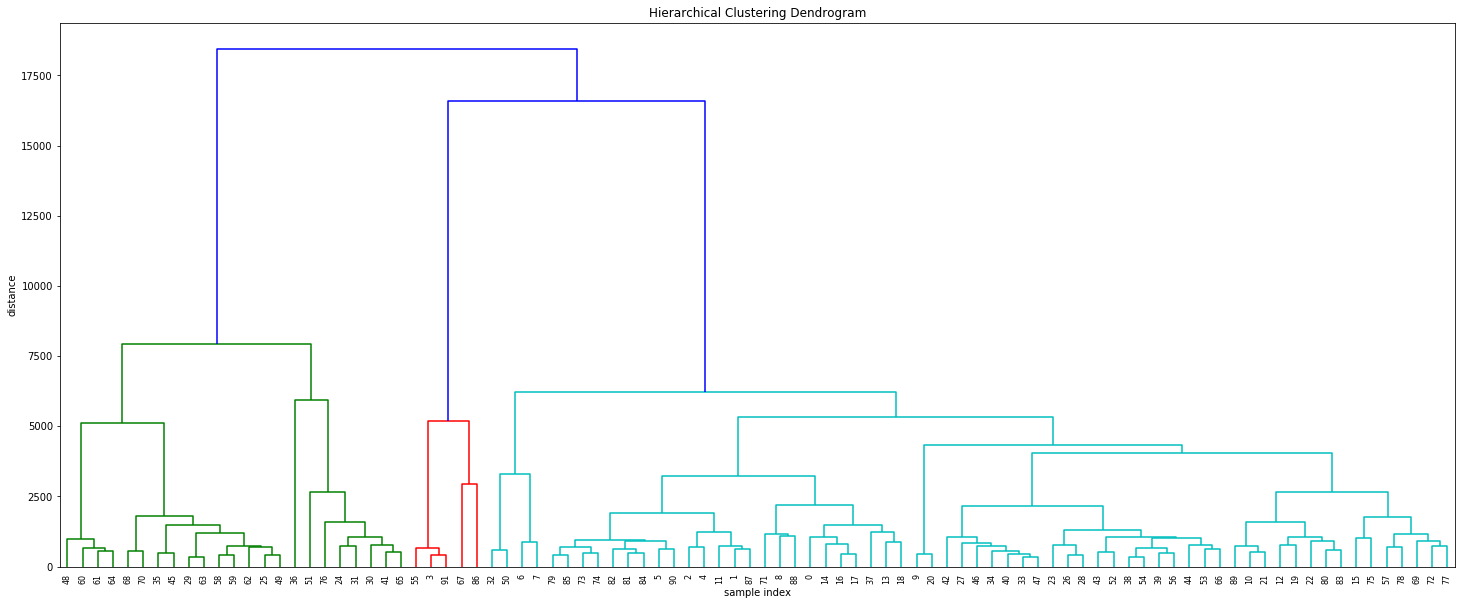

In [171]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()